<a href="https://colab.research.google.com/github/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/blob/main/Classifier/plot_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window_data = data[i : i + window_size]
        average = sum(window_data) / window_size
        moving_averages.append(average)
    return moving_averages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path, dt):
    data = {
        'Setpoint': [],
        'PV Physical Asset': [],
        'PV Digital Twin': [],
        'MV Physical Asset': [],
        'MV Digital Twin': [],
        'Time': []  # Add a 'Time' key to store time values
    }
    time = 0

    with open(file_path, 'r') as file:
        for line in file:
            # Split the line by spaces and convert the values to float
            values = [float(val) for val in line.split()]

            # Append the values to the respective columns in the data dictionary
            data['Setpoint'].append(values[0]/10)
            data['PV Physical Asset'].append(values[1]/10)
            data['PV Digital Twin'].append(values[2]/10)
            data['MV Physical Asset'].append(values[3]/255)
            data['MV Digital Twin'].append(values[7]/255)

            data['Time'].append(time)  # Append the current time value
            time += dt

    return data

def plot_pv_data(data):
    # Plot the data for setpoint, PV Physical Asset, and PV Digital Twin
    plt.figure(figsize=(8, 4))
    plt.plot(data['Time'], data['Setpoint'], label='Setpoint', color='blue')
    plt.plot(data['Time'], data['PV Physical Asset'], label='PV Physical Asset', color='green')
    plt.plot(data['Time'], data['PV Digital Twin'], label='PV Digital Twin', color='orange')

    plt.xlabel('Time')
    plt.ylabel('Voltage (V)')
    plt.title('Digital Twin vs Real Asset - Error')
    plt.legend()
    plt.grid(True)
    plt.savefig('fig1.pdf')
    plt.show()

def plot_pv_error(data):
    # Calculate the error between PV Physical Asset and PV Digital Twin
    pv_physical = data['PV Physical Asset']
    pv_digital_twin = data['PV Digital Twin']
    error = [pv_p - pv_dt for pv_p, pv_dt in zip(pv_physical, pv_digital_twin)]

    window_size = 15
    result = moving_average(error, window_size)

    # Plot the error
    plt.figure(figsize=(8, 2))
    plt.plot(data['Time'], error, label='Error', color='red')
    plt.plot(result, label='Moving Average of the Error', color='purple')

    plt.xlabel('Time (s)')
    plt.ylabel('Value (V)')
    plt.title('PV Physical Asset - PV Digital Twin Error')
    plt.legend()
    plt.grid(True)
    plt.savefig('fig2.pdf')
    plt.show()


In [ ]:
 def plot_pv_MV(data):
    # Calculate the error between PV Physical Asset and PV Digital Twin
    # Plot the error
    plt.figure(figsize=(8, 2))
    plt.plot(data['Time'], data['MV Physical Asset'], label='MV Physica Asset', color='blue')
    plt.plot(data['Time'], data['MV Digital Twin'], label='MV Digital Twin', color='black')
    plt.xlabel('Time (s)')
    plt.ylabel('Value (V)')
    plt.title('PV Physical Asset - PV Digital Twin Error')
    plt.legend()
    plt.grid(True)
    plt.savefig('fig3.pdf')
    plt.show()

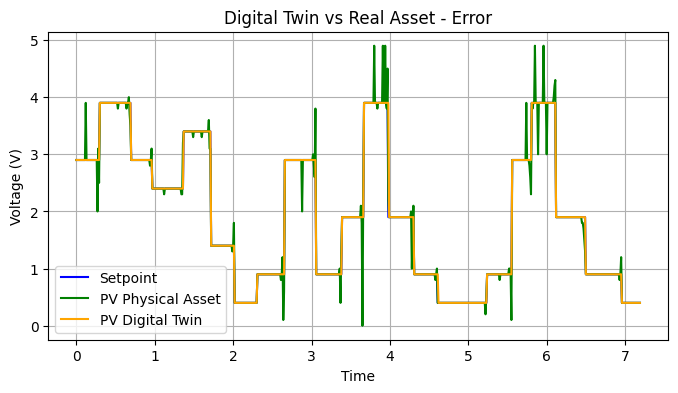

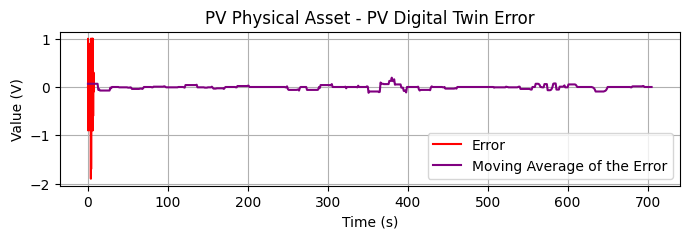

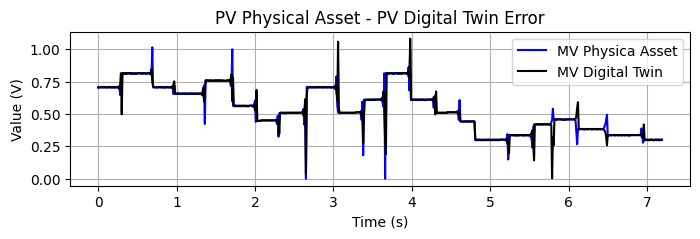

<Figure size 640x480 with 0 Axes>

In [ ]:
if __name__ == "__main__":
    file_path = "jrfid_nominal_120k.txt"  # Replace with the actual file path
    dt = 1e-2  # Time step of 1e-5 seconds
    data = read_data(file_path, dt)
    plot_pv_data(data)
    plot_pv_error(data)
    plot_pv_MV(data)
    plt.savefig('fig.pdf')

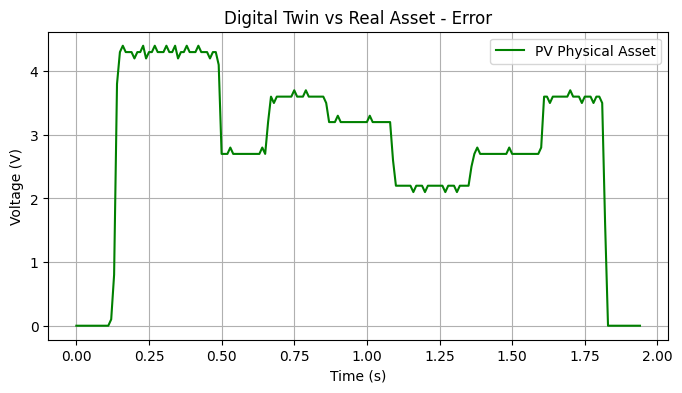

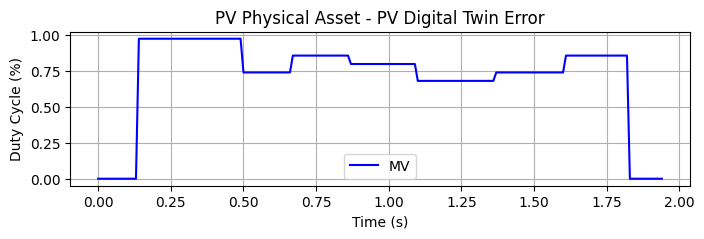

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path, dt):
    data = {
        'Setpoint': [],
        'PV Physical Asset': [],
        'PV Digital Twin': [],
        'MV Physical Asset': [],
        'MV Digital Twin': [],
        'Time': []  # Add a 'Time' key to store time values
    }
    time = 0

    with open(file_path, 'r') as file:
        for line in file:
            # Split the line by spaces and convert the values to float
            values = [float(val) for val in line.split()]

            # Append the values to the respective columns in the data dictionary
            data['Setpoint'].append(values[0]/255)
            data['PV Physical Asset'].append(values[1]/10)
            data['PV Digital Twin'].append(values[2]/10)
            data['MV Physical Asset'].append(values[3]/255)
            data['MV Digital Twin'].append(values[4]/255)

            data['Time'].append(time)  # Append the current time value
            time += dt

    return data

def plot_pv_data(data):
    # Plot the data for setpoint, PV Physical Asset, and PV Digital Twin
    plt.figure(figsize=(8, 4))

    plt.plot(data['Time'], data['PV Physical Asset'], label='PV Physical Asset', color='green')
    #plt.plot(data['Time'], data['PV Digital Twin'], label='PV Digital Twin', color='orange')

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Digital Twin vs Real Asset - Error')
    plt.legend()
    plt.grid(True)
    plt.savefig('fig1.pdf')
    plt.show()

def plot_pv_error(data):
    # Calculate the error between PV Physical Asset and PV Digital Twin
    pv_physical = data['PV Physical Asset']
    pv_digital_twin = data['PV Digital Twin']
    error = [pv_p - pv_dt for pv_p, pv_dt in zip(pv_physical, pv_digital_twin)]

    window_size = 15
    result = moving_average(error, window_size)

    # Plot the error
    plt.figure(figsize=(8, 2))
    plt.plot(data['Time'], data['Setpoint'], label='MV', color='blue')
    #plt.plot(data['Time'], error, label='Error', color='red')
    #plt.plot(result, label='Moving Average of the Error', color='purple')

    plt.xlabel('Time (s)')
    plt.ylabel('Duty Cycle (%)')
    plt.title('PV Physical Asset - PV Digital Twin Error')
    plt.legend()
    plt.grid(True)
    plt.savefig('fig2.pdf')
    plt.show()

if __name__ == "__main__":
    file_path = "jrfid_data_6_8k.txt"  # Replace with the actual file path
    dt = 1e-2  # Time step of 1e-5 seconds
    data = read_data(file_path, dt)
    plot_pv_data(data)
    plot_pv_error(data)
    plt.savefig('RealData1k.pdf')


In [ ]:
import pandas as pd
import numpy as np
import os

# List of file names
file_names = [
    'jrfid_sensorFault_14v_2.txt'
]

# Initialize an empty DataFrame to store results
sensorFault_df = pd.DataFrame()

# Process each file
for file_name in file_names:
    # Read the .txt file
    file_path = os.path.join('', file_name)  # Assuming files are in the same directory as the script
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)

    # Select the first four columns
    new_df = df.iloc[:, :4]

    # Create lists to store the values
    values = [[] for _ in range(len(new_df.columns))]

    # Iterate over the rows and append values to the lists
    for _, row in new_df.iterrows():
        for i, val in enumerate(row):
            values[i].append(val)

    SP = values[0]
    PV_real = values[1]
    PV_dt = values[2]
    MV = values[3]

    data = {
        'fault type': 2,
        'input voltage': SP[0] / 10,
        'MV': [MV],
        'voltage': [PV_real]
    }

    # Create a DataFrame from the dictionary
    df0 = pd.DataFrame(data)
    df0['voltage'] = df0['voltage'].apply(lambda x: [v / 10 for v in x])

    # Remove values equal to 0 from "voltage" column and corresponding values from "MV" column
    for index, row in df0.iterrows():
        voltage_values = np.array(row['voltage'])
        mv_values = np.array(row['MV'])

        # Find indices where voltage is not equal to 0
        non_zero_indices = np.where(voltage_values != 0)[0]

        # Filter both voltage and MV arrays
        voltage_values_filtered = voltage_values[non_zero_indices]
        mv_values_filtered = mv_values[non_zero_indices]

        # Update DataFrame with filtered values
        df0.at[index, 'voltage'] = voltage_values_filtered.tolist()
        df0.at[index, 'MV'] = mv_values_filtered.tolist()

    # Append the processed DataFrame to the final DataFrame
    sensorFault_df = pd.concat([sensorFault_df, df0], ignore_index=True)

sensorFault_df

,fault type,input voltage,MV,voltage
0,2,1.4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, ..."


In [ ]:
import pandas as pd

def process_file(filename):
    # Read the .txt file
    df = pd.read_csv(filename, delim_whitespace=True, header=None)

    # Select the first four columns
    new_df = df.iloc[:, :4]

    # Create lists to store the values
    values = [[] for _ in range(len(new_df.columns))]

    # Iterate over the rows and append values to the lists
    for _, row in new_df.iterrows():
        for i, val in enumerate(row):
            values[i].append(val)

    SP = values[0]
    PV_real = values[1]
    PV_dt = values[2]
    MV = values[3]

    data = {
        'fault type': 1,
        'input voltage': SP[0]/10,
        'MV': [MV],
        'voltage': [PV_real]
    }

    # Create a DataFrame from the dictionary
    df1 = pd.DataFrame(data)
    df1['voltage'] = df1['voltage'].apply(lambda x: [v/10 for v in x])

    return df1

# Process each file
filenames = [
    'jrfid_actuatorFault_14v.txt'
]

dfs = []
for filename in filenames:
    dfs.append(process_file(filename))

# Concatenate all DataFrames into one
actuatorFault_df = pd.concat(dfs, ignore_index=True)
actuatorFault_df

,fault type,input voltage,MV,voltage
0,1,1.4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


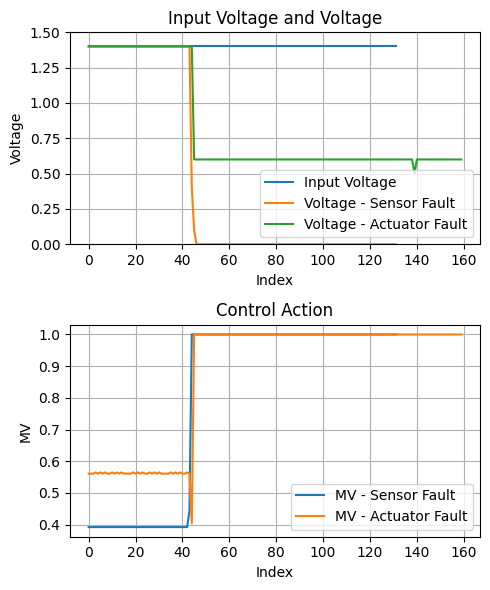

In [ ]:
import matplotlib.pyplot as plt

for index, row in actuatorFault_df.iterrows():
    voltage_values = np.array(row['voltage'])
    mv_values0 = np.array(row['MV'])/255

for index, row in sensorFault_df.iterrows():
    voltage_values = np.array(row['voltage'])
    mv_values1 = np.array(row['MV'])/255

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 6))

# Plot input_voltage and voltage on the first subplot
input_voltage = actuatorFault_df['input voltage'].iloc[0]
voltage0 = actuatorFault_df['voltage'].iloc[0]
x = np.arange(len(voltage0))
voltage0 = voltage0[::-1]
mv_values0 = mv_values0[::-1]

# Plot input_voltage and voltage on the first subplot for df1
input_voltage_1 = sensorFault_df['input voltage'].iloc[0]
voltage_1 = sensorFault_df['voltage'].iloc[0]
x_1 = np.arange(len(voltage_1))
voltage_1 = voltage_1[::-1]
mv_values1 = mv_values1[::-1]

axs[0].plot(x, [input_voltage] * len(voltage0), label='Input Voltage')
axs[0].plot(x, voltage0, label='Voltage - Sensor Fault')
axs[0].plot(x_1, voltage_1, label='Voltage - Actuator Fault')
axs[0].set_title('Input Voltage and Voltage')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Voltage')
axs[0].set_ylim([0, 1.5])
axs[0].legend()
axs[0].grid(True)  # Add grid

# Plot MV on the second subplot
axs[1].plot(x, mv_values0, label='MV - Sensor Fault')
axs[1].plot(x_1, mv_values1, label='MV - Actuator Fault')
axs[1].set_title('Control Action')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('MV')
axs[1].legend()
axs[1].grid(True)  # Add grid

# Adjust layout
plt.tight_layout()
plt.savefig('Real_differentFault.pdf')
# Show plot
plt.show()
